# Assignment 3

## Instructions
- Run this notebook on ```Google Colab(preferable)```
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells. 

## Packages Used
- Keras [link](https://keras.io/guides/)

## Submission
- Rename the notebook to `<roll_number>_Assignment3_Q1.ipynb`.

## Question 1

This question is based on seminal work by Zhang et al. The paper is titled 'Understanding deep learning requires rethinking generalization'. The paper talks about how the traditional methods fail to explain generalization of neural network. They show that a sufficiently parameterized network can easily fit a random labeling of the training data. This fitting cannot be curbed by explicit regularization.


## Q) 1.1 
Lets take a hello world dataset for ML algorithm the MNIST!
This question requires you to train a convolutional neural network.
Architecture: 4 layers of convolution with 64 filters in each layer. Keep activation map size same using padding.

In [ ]:
from tensorflow import keras   # feel free to use MNIST data from other sources 
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("Train data shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

Train data shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


#### One-hot-encode your labels here

In [ ]:
print ('label shape: ',np.shape(y_train),np.shape(y_test))
def encode(y):
    temp=[]
    for i in y:
        temp2=[0,0,0,0,0,0,0,0,0,0]
        temp2[i]=1
        temp.append(temp2);
    return np.array(temp)

y_train = encode(y_train)
y_test = encode(y_test)
print ('label shape: ',np.shape(y_train),np.shape(y_test))

label shape:  (60000,) (10000,)
label shape:  (60000, 10) (10000, 10)


In [ ]:
y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

#### Define the model mentioned above
    1) Print the number of trainable parameters
     Use sgd optimizer with softmax at last layer 
     Train the model until convergence (use test data only for model selection and early stopping!)
    2) Report the train and test accuracy
    3) Plot the train and test accuracy and loss throughout the training

In [ ]:
#code here
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Input
#from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

def create_model():
    model = Sequential()
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1), padding='Same'))
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', kernel_initializer='he_uniform', padding='Same'))
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', kernel_initializer='he_uniform', padding='Same'))
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', kernel_initializer='he_uniform', padding='Same'))
    model.add(Flatten())
    #model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    opt = SGD(learning_rate=0.01)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

def fit_n_eval(model):
    es = EarlyStopping(monitor='val_accuracy',mode='max',verbose=1,patience=10)
    history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,verbose=1,callbacks=[es])
    train_acc=model.evaluate(x_train,y_train,verbose=0)
    test_acc=model.evaluate(x_test,y_test,verbose=0)
    print("Training accuracy=%.4f \nTest accuracy: %.4f" % (train_acc[1], test_acc[1]))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title("Model accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("Epochs")
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title("Model loss")
    plt.ylabel("Loss")
    plt.xlabel("Epochs")
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 50176)             0         
                                                                 
 dense (Dense)               (None, 10)                501770    
                                                                 
Total params: 613,194
Trainable params: 613,194
Non-trai

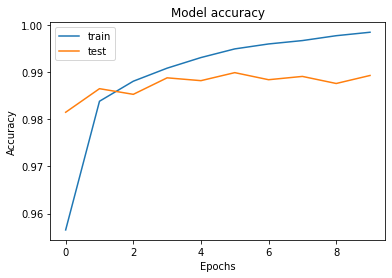

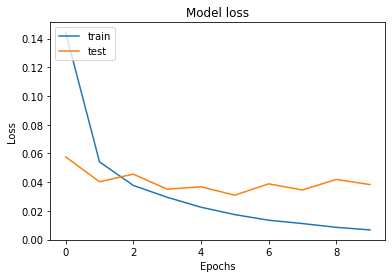

In [ ]:
model = create_model()
fit_n_eval(model)


## Q) 1.2
Now lets start adding label noise to the dataset


1) Randomize 20% of train labels and repeat Q1 (1,2 & 3)

2) Randomize 40% of train labels and repeat Q1 (3)

3) Randomize 60% of train labels and repeat Q1 (3)

4) Randomize 80% of train labels and repeat Q1 (3)

5) Randomize 100% of train labels and repeat Q1 (3)


After 20% randomization
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 flatten_1 (Flatten)         (None, 50176)             0         
                                                                 
 dense_1 (Dense)             (None, 10)                501770    
                                                                 
Total params: 613,194
Trainabl

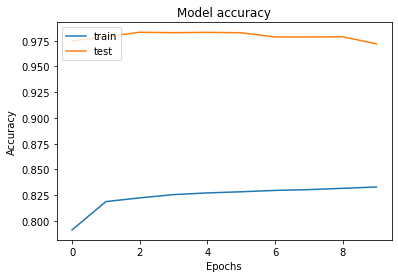

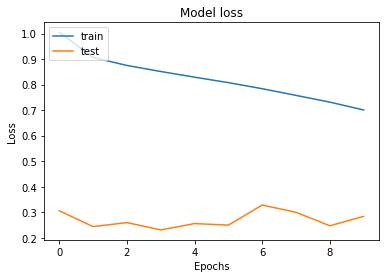

After 40% randomization
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 conv2d_11 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 flatten_2 (Flatten)         (None, 50176)             0         
                                                                 
 dense_2 (Dense)             (None, 10)                501770    
                                                                 
Total params: 613,194
Trainabl

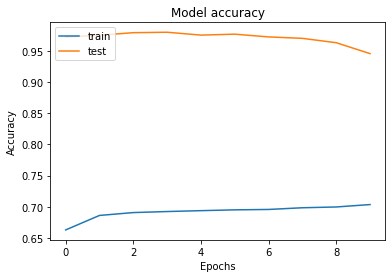

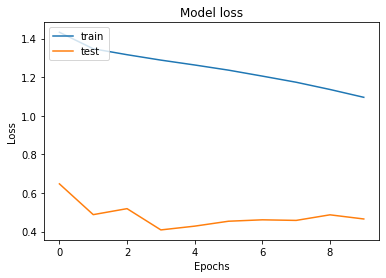

After 60% randomization
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 conv2d_13 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 conv2d_14 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 conv2d_15 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 flatten_3 (Flatten)         (None, 50176)             0         
                                                                 
 dense_3 (Dense)             (None, 10)                501770    
                                                                 
Total params: 613,194
Trainabl

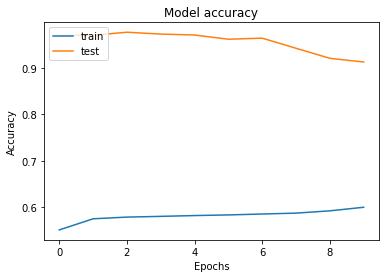

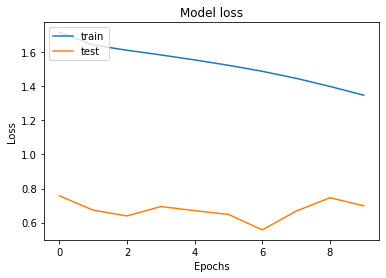

After 80% randomization
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 conv2d_17 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 conv2d_18 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 conv2d_19 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 flatten_4 (Flatten)         (None, 50176)             0         
                                                                 
 dense_4 (Dense)             (None, 10)                501770    
                                                                 
Total params: 613,194
Trainabl

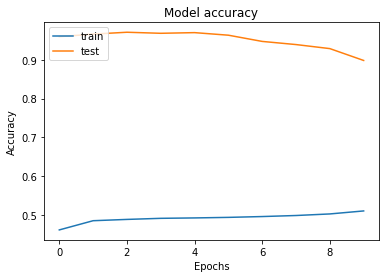

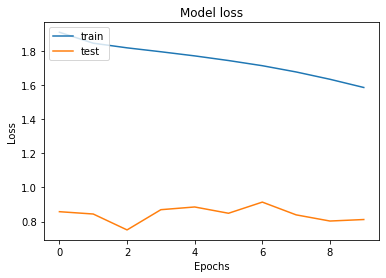

After 100% randomization
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 conv2d_21 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 conv2d_22 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 conv2d_23 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 flatten_5 (Flatten)         (None, 50176)             0         
                                                                 
 dense_5 (Dense)             (None, 10)                501770    
                                                                 
Total params: 613,194
Trainab

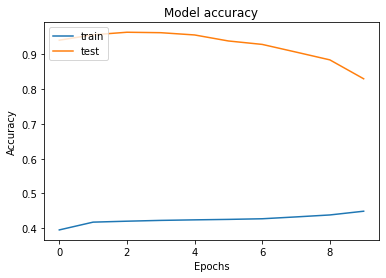

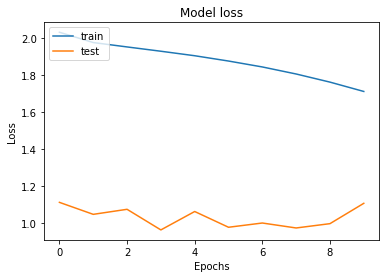

In [ ]:
import random

for i in [0.2,0.4,0.6,0.8,1]:
    (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
    x_train = x_train.astype("float32") / 255
    x_test = x_test.astype("float32") / 255
    total_size=int(x_train.shape[0])

    x_train = np.expand_dims(x_train, -1)
    x_test = np.expand_dims(x_test, -1)
    print("After {}% randomization".format(int(i*100)))
    num_indices=int(i*total_size)
    indices=[]
    for i in range(num_indices):
      indices.append(random.randint(0,total_size-1))

    values=y_train[indices]
    random.shuffle(values)
    y_train[indices]=values

    y_train=encode(y_train)
    y_test=encode(y_test)
    model=create_model()
    fit_n_eval(model)